    Rok_studiow Stan_cywilny
0             1            W
1             2            W
2             5            M
3             1            W
4             4            M
5             3            W
6             2            M
7             1            W
8             5            M
9             2            W
10            3            M
11            4            M
12            1            W
13            2            W
14            5            M
15            4            M
16            3            M
17            1            M
18            4            M
19            5            W
20            2            W
21            5            M
22            3            W
23            4            W
24            3            M
25            2            W
26            5            M
27            1            W
    Rok_studiow  Stan_cywilny
0             1             0
1             2             0
2             5             1
3             1             0
4        

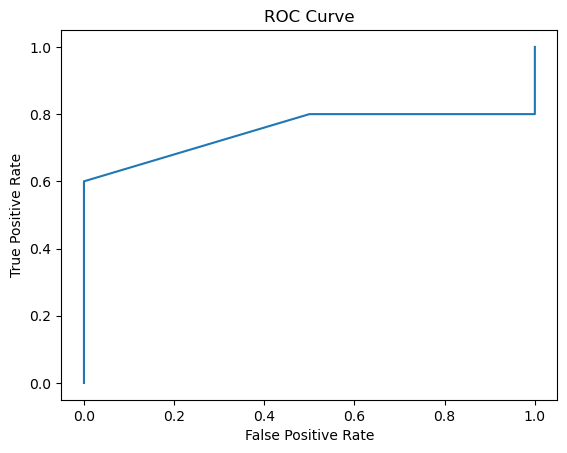

    Rok_studiow
2             5
22            3
14            5
17            1
5             3
11            4
24            3
13            2
20            2
[1 0 1 0 0 1 0 0 0]


In [46]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np

# dane
data = pd.read_csv('Stan_cywilny.csv', sep=';', header=0)


# logistyczna regresja
# p - prawdopodobieństwo przynależności do klasy 1
# linia decyzyjna
# logreg = LogisticRegression()

# predict_proba - zwraca prawdopodobieństwo przynależności do klasy 0 i 1
# 2 dimmensional array
# druga kolumna - prawdopodobieństwo przynależności do positive class
# threshold - 0.5 - domyślny próg odcięcia dla klasyfikatora binarnego
# krzywa ROC - Receiver Operating Characteristic
# fpr- false positive rate
# tpr- true positive rate

# zeby uzykac tylko positive class
#y_pred_probs = logreg.predict_proba(X_test)[:, 1]
# print(classification_report(y_test, y_pred))
# wyswietli precision, recall, f1-score, support
# optymalizacja - zmiana thresholdu
# uzyj cross validation
# grid search
#print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
#print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

# data
print(data)
# change M to 1 and W to 0
data['Stan_cywilny'] = data['Stan_cywilny'].map({'M': 1, 'W': 0})
print(data)

# model - regresja logistyczna
logreg= LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(data[['Rok_studiow']], data['Stan_cywilny'], test_size=0.3, random_state=0)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
# confusion matrix
print(confusion_matrix(y_test, y_pred))
# prawdopodobieństwo przynależności do klasy 0 i 1
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(y_pred_probs)
# auc
print(roc_auc_score(y_test, y_pred_probs))
# krzywa roc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)


# wykres
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print(X_test)
print(y_pred)



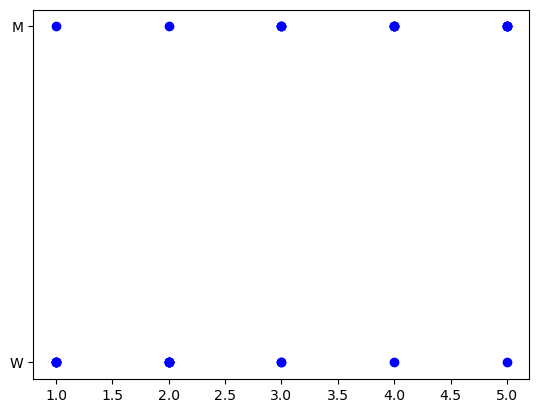

In [30]:
#

